# **YOLOv5**

In questo notebook è implementato un'addestramento della rete [YOLOv5](https://github.com/ultralytics/yolov5) di PyTorch per poter rilevare la presenza di mascherine nelle immagini di un [dataset kaggle](https://www.kaggle.com/datasets/andrewmvd/face-mask-detection).

# Operazioni preliminari

In questa sezione vengono importati moduli e librerie utilizzate, viene eseguito il download del dataset e vengono installati i *requirements* necessari.

## Import delle librerie

Di seguito sono riportate le descrizioni dei moduli utilizzati:
- **os** - Modulo per interagire col sistema operativo gestendo file, cartelle, etc..
- **join** - Funzione del modulo *os.path* utilizzata per unire due o più path in un singolo percorso valido per il sistema operativo corrente.
- **glob** - Modulo utile per la ricerca di percorsi di file con determinati pattern (es. '/*.png')
- **np** - Libreria fondamentale per il calcolo scientifico in Python;
- **shutil** - Modulo utile per eseguire operazioni di alto livello sui file (es. copia, rinominazione, etc..);
- **cv2** - Famosa libreria Python per la manipolazione di immagini e video;
- **random** - Modulo Python che fornisce funzionalità per generare numeri casuali;
- **Image** - Libreria Python utilizzata per l'elaborazione e la manipolazione di immagini;
- **ElementTree** - Libreria standard di Python per analizzare e manipolare file XML;
- **Path** - Classe del modulo *pathlib* utile per lavorare con percorsi di file e directory;
- **pyplot** - Modulo che fornisce un'interfaccia per creare grafici in Python;
- **tqdm** - Classe utilizzata per creare indicatori di avanzamento;
- **train_test_split** - Funzione della libreria scikit-learn per dividere un dataset nei vari sottoinsiemi;
- **itemgetter** - Funzione del modulo *operator* per estrarre elementi da sequenze di elementi;
- **files** - Modulo per poter interagire con i file nell'ambiente di sviluppo Google Colaboratory;
- **drive** - Modulo che fornisce funzionalità per l'accesso e l'interazione con Google Drive all'interno di Google Colaboratory;
- **cv2_imshow** - Funzione utile per visualizzare immagini;

In [ ]:
import os
from os.path import join
import glob
import numpy as np
import shutil
import cv2
import random
from PIL import Image
from xml.etree import ElementTree as ET
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from operator import itemgetter
from google.colab import files
from google.colab import drive
from google.colab.patches import cv2_imshow

## Download del dataset

E' di seguito riportato il codice per scaricare il dataset da Kaggle, nello specifico:
- Vengono installate le librerie *kaggle*, *opendatasets* e *Pillow*;
- *files.upload()* permette di poter caricare il file Kaggle con il token (univoco per ogni utente, scaricabile da Kaggle);
- Viene creata la directory necessaria per poter scaricare un dataset da Kaggle ed al suo interno viene copiato il file con il token con i permessi di lettura e scrittura;
- Viene scaricato il [dataset](https://www.kaggle.com/datasets/andrewmvd/face-mask-detection);
- Unzip del dataset e eliminazione del file.zip;*testo in corsivo*

In [ ]:
# Installazione librerie
!pip install kaggle
!pip install opendatasets
!pip install Pillow

# Caricamento del token Kaggle
files.upload()

# Creazione cartella e copia del token con permessi di lettura e scrittura
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download del dataset
!kaggle datasets download -d andrewmvd/face-mask-detection

# Unzip del dataset
!unzip face-mask-detection.zip

# Rimozione del file.zip
!rm /content/face-mask-detection.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
 99% 393M/398M [00:04<00:00, 62.8MB/s]
100% 398M/398M [00:04<00:00, 91.0MB/s]
Archive:  face-mask-detection.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: a

## Download utility

Nella cella sottostante viene scaricata la [repository GitHub](https://github.com/Zimon99/yolo_utils) contenente tutto il materiale necessario (requirements, modello, pesi, etc..)

In [ ]:
!git clone https://github.com/Zimon99/yolo_utils.git

Cloning into 'yolo_utils'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 137 (delta 11), reused 57 (delta 7), pack-reused 56
Receiving objects: 100% (137/137), 14.17 MiB | 9.69 MiB/s, done.
Resolving deltas: 100% (41/41), done.


## Installazione dei requirements

All'interno del file di testo [*requirements.txt*](https://github.com/Zimon99/yolo_utils/blob/main/requirements.txt) sono elencate tutte le versioni delle varie librerie necessarie per poter eseguire il notebook.

In [ ]:
!pip install -r /content/yolo_utils/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00


# Visualizzazione dei dati

Eseguendo la cella sottostante, verranno mostrate quattro immagini selezionate casualmente dal set di addestramento, insieme alle rispettive annotazioni.

Le bounding box visualizzate nelle immagini sono colorate in base alle seguenti classi:

- Rosso - *with_mask* (con mascherina)
- Verde - *without_mask* (senza mascherina)
- Blu - *mask_weared_incorrect* (mascherina indossata in modo non corretto)



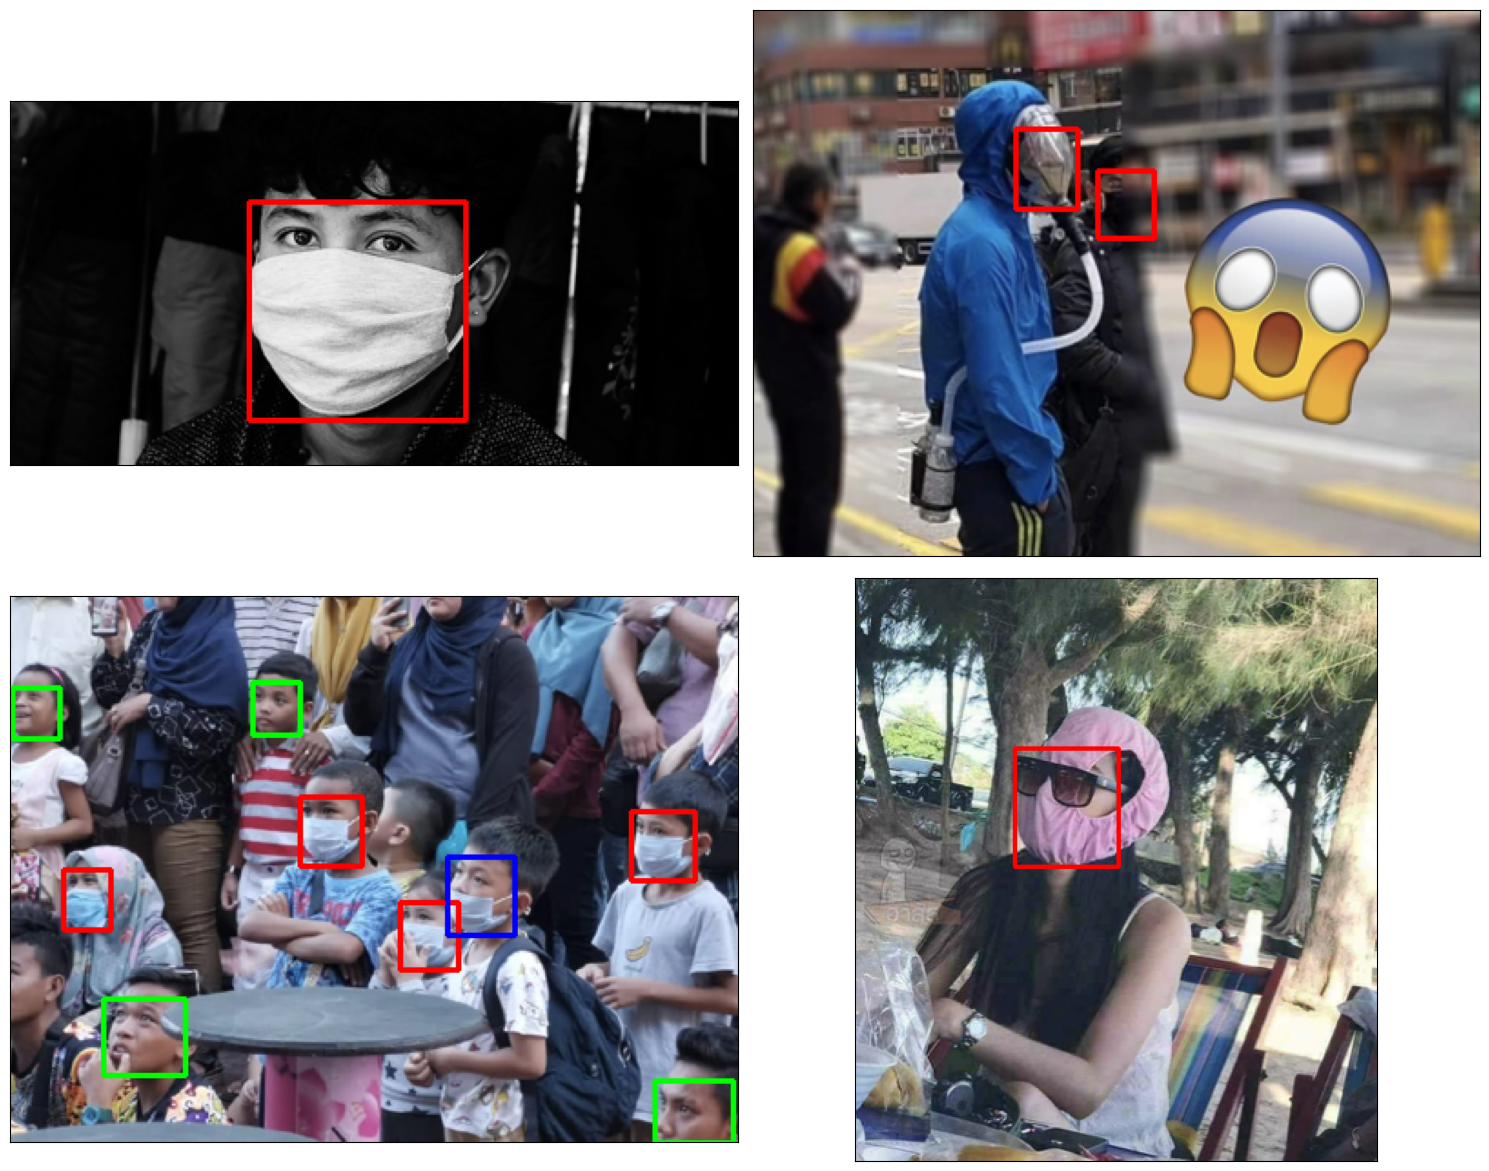

In [ ]:
# Selezione di indici di 4 immagini random
random_idx = random.sample(range(1, len(glob.glob('/content/images/*.png'))), 4)

# Estrazione dei percorsi delle immagini
img_paths = itemgetter(*random_idx)(glob.glob('/content/images/*.png'))

# Creazione della griglia
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

row = 0
for i, path in enumerate(img_paths):

    # Lettura e conversione dell'immagine (da BGR A RGB)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    ann_path = path.replace('images', 'annotations').replace('png', 'xml')
    tree = ET.parse(ann_path)
    root = tree.getroot()

    # Itera tutti gli oggetti dell'annotazione
    for obj in root.findall("object"):
      # Estrazione coordinate e label
      cls = obj.find("name").text
      xmin = int(obj.find("bndbox/xmin").text)
      ymin = int(obj.find("bndbox/ymin").text)
      xmax = int(obj.find("bndbox/xmax").text)
      ymax = int(obj.find("bndbox/ymax").text)

      # Creazione della bounding box
      if cls == 'with_mask':
        cv2.rectangle(img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255, 0, 0), 2)
      elif cls == 'without_mask':
        cv2.rectangle(img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
      else:
        cv2.rectangle(img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 0, 255), 2)


    if i % 2 == 0:
      axes[row, 0].imshow(img)
    else:
      axes[row, 1].imshow(img)
      row += 1

# Rimozione assi
for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Visualizzazione
plt.tight_layout()
plt.show()

# Funzioni di utilità

Nella cella sottostante sono definite alcune funzioni di utilità utilizzate nel notebook, nello specifico:
- **rename_dataset_names(dir)** - Rinomina i file presenti nella cartella *dir* con nomi del tipo *00000001.png*;
- **count_classes_instances(dir, ext)** - Conta il numero di istanze delle 3 classi originali del dataset (*with_mask*, *without_mask* e *mask_weared_incorrect*) leggendoli dai file delle annotazioni presenti nella cartella *dir*, il parametro *ext* specifica il formato in cui sono salvate (*xml* o *txt*);
- **delete_class(class, ann, img)** - Elimina tutti gli *object* contenenti la classe *class*, se l'annotazione conteneva solamente oggetti di quella classe allora elimina sia immagine che relativa annotazione, altrimenti ricarica il file modificato;
- **move_images_and_annotations(img_dst, ann_dst, img_paths)** - Copia le immagini nella cartella *img_paths* nella cartella *img_dst*, uguale per le annotazioni;
- **draw_hist(class1, class2, class3)** - Visualizza l'istogramma del numero di istanze delle 3 classi, i parametri in input sono il numero delle istanze;
- **convert(size, box)** - Normalizza le coordinate delle bounding box. [Crediti](https://github.com/pjreddie/darknet/blob/master/scripts/voc_label.py);
- **convert_annotation(cls, input, output)** - Converte le annotazioni presente nella directory *input* e le salva in *output*. [Crediti](https://github.com/pjreddie/darknet/blob/master/scripts/voc_label.py);

In [ ]:
def rename_dataset_names(directory):
  for filename in os.listdir(directory):
    replaced = filename.replace("maksssksksss", "")
    name_length = len(replaced)
    if name_length < 12:
      nuovo_nome = "0" * (12 - name_length) + replaced
      os.rename(os.path.join(directory, filename), os.path.join(directory, nuovo_nome))

def count_classes_instances(ann_dir, ext):
  cont_with_mask = 0
  cont_without_mask = 0
  cont_incorrect_mask = 0

  # Se l'annotazione è in formato xml
  if ext == 'xml':
    for xml_file in glob.glob(os.path.join(ann_dir, "*.xml")):
      tree = ET.parse(xml_file)
      root = tree.getroot()
      for obj in root.findall("object"):
        class_name = obj.find("name").text
        if class_name == "with_mask":
          cont_with_mask = cont_with_mask + 1
        if class_name == "without_mask":
          cont_without_mask = cont_without_mask + 1
        if class_name == "mask_weared_incorrect":
          cont_incorrect_mask = cont_incorrect_mask + 1
  else:
    # Se l'annotazione è in formato txt
    for txt_file in glob.glob(ann_dir + "/*.txt"):
      with open(txt_file, 'r') as file:
        for rows in file:
          if rows[0] == '0':
            cont_with_mask = cont_with_mask + 1
          if rows[0] == '1':
            cont_without_mask = cont_without_mask + 1
          if rows[0] == '2':
            cont_incorrect_mask = cont_incorrect_mask + 1

  return cont_with_mask, cont_without_mask, cont_incorrect_mask

def delete_class(class_name, ann_dir, img_dir):
  obj_analyzed = 0
  obj_removed = 0
  for xml_file in glob.glob(os.path.join(ann_dir, "*.xml")):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Rimozione delle bounding box con la classe da eliminare
    for obj in root.findall("object"):
      obj_analyzed = obj_analyzed + 1
      cls_name = obj.find("name").text
      if cls_name == class_name:
        root.remove(obj)
        obj_removed = obj_removed + 1

    # Se l'annotazione conteneva solamente istanze della classe da eliminare viene eliminata con la relativa immagine
    if obj_removed == obj_analyzed:
      img = xml_file.replace("annotations", "images").replace("xml", "png")
      !rm $xml_file
      !rm $img
    else:
      tree.write(xml_file)

    obj_analyzed = 0
    obj_removed = 0

def move_images_and_annotations(images_dst_path, annotations_dst_path, img_paths):

  for path in img_paths:
    ann_path = path.replace("images", "processed_annotations").replace("png", "txt")
    shutil.move(path, images_dst_path)
    shutil.move(ann_path, annotations_dst_path)

def draw_hist(with_mask, without_mask, incorrect_mask):
  num_instances = [with_mask, without_mask, incorrect_mask]
  class_labels = ['with_mask', 'without_mask', 'mask_weared_incorrect']

  plt.bar(class_labels, num_instances)
  plt.title('Numero di istanze per classe')
  plt.xlabel('Classe')
  plt.ylabel('Numero di istanze')

  plt.show()

def convert(size, box):
    dw = 1./(size[0])
    dh = 1./(size[1])
    x = (box[0] + box[1])/2.0 - 1
    y = (box[2] + box[3])/2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x,y,w,h)

def convert_annotation(classes, input_path, output_path):
    basename = os.path.basename(input_path)
    basename_no_ext = os.path.splitext(basename)[0]

    in_file = open(input_path)
    out_file = open(output_path + "/" + basename_no_ext + '.txt', 'w')

    tree = ET.parse(in_file)
    root = tree.getroot()
    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    for obj in root.iter('object'):
        cls = obj.find('name').text
        if cls not in classes:
            continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (float(xmlbox.find('xmin').text), float(xmlbox.find('xmax').text), float(xmlbox.find('ymin').text), float(xmlbox.find('ymax').text))
        bb = convert((w,h), b)
        out_file.write(str(cls_id) + " " + " ".join([str(a) for a in bb]) + '\n')

    in_file.close()
    out_file.close()

# Data Preprocessing
Questa sezione comprende una serie di operazioni che vengono eseguite su immagini e annotazioni all'interno del dataset al fine di renderli adatti per l'addestramento e l'applicazione del modello.


Creazione della cartella generale *datasets*, necessaria per l'addestramento del modello.

In [ ]:
Path('datasets').mkdir(parents=True, exist_ok=True)
!mv /content/images /content/annotations /content/datasets/

## Rinominazione dei dati

E' stato necessario apportare alcune modifiche ai nomi delle variabili per renderli più descrittivi e significativi. I nomi originali delle immagini e delle annotazioni forniti nel dataset erano poco chiari e non intuitivi, quindi sono stati rinominati in modo coerente per una migliore comprensione.

In [ ]:
rename_dataset_names("/content/datasets/images")
rename_dataset_names("/content/datasets/annotations")

## Conversione delle annotazioni

Nella cella sottostante, vengono convertite tutte le annotazioni nel formato appropriato utilizzando il metodo *convert_annotation(..)*.

Durante questo processo, le annotazioni vengono trasformate dal formato *xml* al formato *txt* e vengono normalizzate nel range [0,1].

Nello specifico, per ogni file di annotazione viene creato un file txt con lo stesso nome aggiungendo classi e coordinate delle bounding box nella seguente forma: **Classe xmin xmax ymin ymax**

In [ ]:
for path in tqdm(glob.glob(LABEL_DIR + '/*.xml')):
    convert_annotation(classes, path, PROCESSED_LABEL_DIR)

## Rimozione della classe *mask_weared_incorrect*

La cella sottostante mostra il numero di istanze per le 3 classi presenti nel dataset.

Istanze della classe [with_mask]            : 3232
Istanze della classe [without_mask]         : 717
Istanze della classe [mask_weared_incorrect]: 123


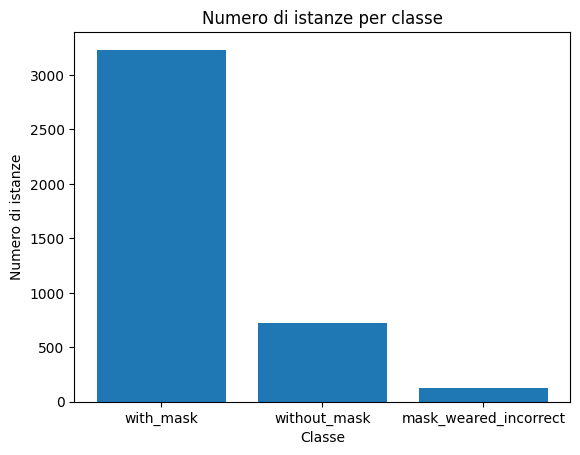

In [ ]:
# Calcolo del numero di istanze per ogni classe.
with_mask, without_mask, incorrect_mask = count_classes_instances("/content/datasets/annotations", 'xml')

print(f"Istanze della classe [with_mask]            : {str(with_mask)}")
print(f"Istanze della classe [without_mask]         : {str(without_mask)}")
print(f"Istanze della classe [mask_weared_incorrect]: {str(incorrect_mask)}")

# Visualizzazione dell'istogramma.
draw_hist(with_mask, without_mask, incorrect_mask)

Come si può notare dal precedente istogramma, la terza classe presentava un numero estremamente ridotto di istanze rispetto alle altre classi, il che avrebbe potuto influire negativamente sull'addestramento del modello e sulla capacità di generalizzazione dei risultati. Di conseguenza, è stato deciso di eliminare la terza classe per garantire un bilanciamento adeguato tra le 2 classi rimanenti.


Istanze della classe [with_mask]            : 3232
Istanze della classe [without_mask]         : 717
Istanze della classe [mask_weared_incorrect]: 0


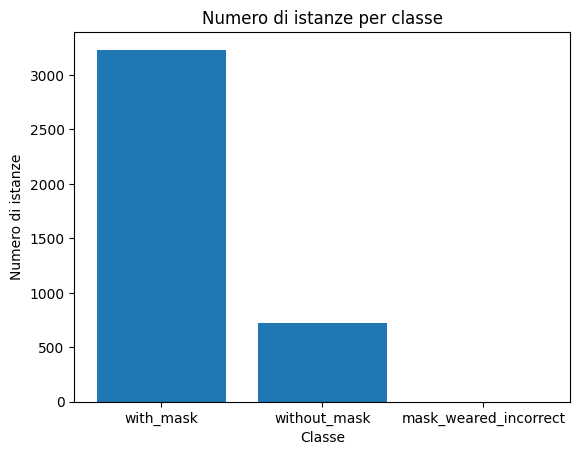

In [ ]:
# Eliminazione della classe "mask_weared_incorrect"
delete_class("mask_weared_incorrect", "/content/datasets/annotations", "/content/datasets/images")

# Calcolo del numero di istanze per ogni classe.
with_mask, without_mask, incorrect_mask = count_classes_instances("/content/datasets/annotations", 'xml')

print(f"Istanze della classe [with_mask]            : {str(with_mask)}")
print(f"Istanze della classe [without_mask]         : {str(without_mask)}")
print(f"Istanze della classe [mask_weared_incorrect]: {str(incorrect_mask)}")

# Visualizzazione dell'istogramma.
draw_hist(with_mask, without_mask, incorrect_mask)

# Creazione della struttura di cartelle necessarie

Eseguendo la cella sottostante vengono create le varie directory relative a trainig, validation e test set. Vengono inoltre definite classi e estensioni delle immagini.

In [ ]:
# Definizione dei percorsi
DATA_DIR = '/content/datasets'
IMAGE_DIR = '/content/datasets/images'
LABEL_DIR = '/content/datasets/annotations'
PROCESSED_LABEL_DIR = '/content/datasets/processed_annotations'
TRAIN_DATA_DIR = '/content/datasets/train'
VALID_DATA_DIR = '/content/datasets/valid'
TEST_DATA_DIR = '/content/datasets/test'

# Creazione delle cartelle
Path(TRAIN_DATA_DIR).mkdir(parents=True, exist_ok=True)
Path(VALID_DATA_DIR).mkdir(parents=True, exist_ok=True)
Path("/content/datasets/train/images").mkdir(parents=True, exist_ok=True)
Path("/content/datasets/train/labels").mkdir(parents=True, exist_ok=True)
Path("/content/datasets/valid/images").mkdir(parents=True, exist_ok=True)
Path("/content/datasets/valid/labels").mkdir(parents=True, exist_ok=True)
Path("/content/datasets/test/images").mkdir(parents=True, exist_ok=True)
Path("/content/datasets/test/labels").mkdir(parents=True, exist_ok=True)
Path(PROCESSED_LABEL_DIR).mkdir(parents=True, exist_ok=True)

classes = ['with_mask', 'without_mask']
IMAGE_EXT = ".png"

## Divisione del dataset

Il dataset viene inizialmente diviso in 2 sottoinsiemi, quello relativo all'addestramento (training e validation set) e quello di test (test set).

Successivamente le immagini e le annotazioni di test sono spostate nelle apposite directory (*test_images* e *test_annotations*).


In [ ]:
# Divisione in training/validation e test set
train_val_indices, test_indices = train_test_split(
    np.arange(len(glob.glob('/content/datasets/images/*.png'))), test_size=0.2, random_state=42, shuffle=True)

move_images_and_annotations(TEST_DATA_DIR + '/images', TEST_DATA_DIR + '/labels', itemgetter(*test_indices)(glob.glob('/content/datasets/images/*.png')))

Ora la parte di dataset relativa all'addestramento viene divisa in training e validation set, dopodichè, le immagini e le annotazioni vengono spostate nelle relative cartelle.

Abbiamo trovato molto utile l'utilizzo della funzione *itemgetter* del modulo *operator* per riuscire ad estrarre solamente le immagini relative agli indici calcolati dalla funzione *train_test_split* del modulo *model_selection* di Scikit-learn.

In [ ]:
# Divisione in training e validation set
train_indices, val_indices = train_test_split(
    np.arange(len(train_val_indices)), test_size=0.3, random_state=42, shuffle=True)

move_images_and_annotations(TRAIN_DATA_DIR + '/images', TRAIN_DATA_DIR + '/labels', itemgetter(*train_indices)(glob.glob('/content/datasets/images/*.png')))
move_images_and_annotations(VALID_DATA_DIR + '/images', VALID_DATA_DIR + '/labels', glob.glob('/content/datasets/images/*.png'))

Il seguente blocco di stampa a video il numero totale di immagini nei tre sottoinsiemi del dataset e il numero di istanze di ogni classe per ogni sottoinsieme.


In [ ]:
img_tot = len(glob.glob(TRAIN_DATA_DIR + '/images/*.png')) + len(glob.glob(VALID_DATA_DIR + '/images/*.png')) + len(glob.glob(TEST_DATA_DIR + '/images/*.png'))

# Calcolo del numero di istanze per ogni classe per ogni sottoinsieme del dataset
train_with_mask, train_without_mask, _ = count_classes_instances(TRAIN_DATA_DIR + '/labels', 'txt')
val_with_mask, val_without_mask, _ = count_classes_instances(VALID_DATA_DIR + '/labels', 'txt')
test_with_mask, test_without_mask, _ = count_classes_instances(TEST_DATA_DIR + '/labels', 'txt')


print(f"Total images   : {str(img_tot)}")
print(f"Train images   : {str(len(glob.glob(TRAIN_DATA_DIR + '/images/*.png')))}")
print(f"   with_mask   : {str(train_with_mask)}")
print(f"   without_mask: {str(train_without_mask)}")
print(f"Valid images   : {str(len(glob.glob(VALID_DATA_DIR + '/images/*.png')))}")
print(f"   with_mask   : {str(val_with_mask)}")
print(f"   without_mask: {str(val_without_mask)}")
print(f"Test  images   : {str(len(glob.glob(TEST_DATA_DIR + '/images/*.png')))}")
print(f"   with_mask   : {str(test_with_mask)}")
print(f"   without_mask: {str(test_without_mask)}")

Total images   : 832
Train images   : 465
   with_mask   : 1582
   without_mask: 410
Valid images   : 200
   with_mask   : 830
   without_mask: 153
Test  images   : 167
   with_mask   : 820
   without_mask: 154


# Addestramento del modello

Nella cella sottostante, viene fornito il codice per avviare il processo di addestramento del modello *YOLOv5*. L'addestramento avviene eseguendo il file *train.py* passando i seguenti parametri:
- **img** - Indica la dimensione a cui verranno ridimensionate le immagini durante l'addestramento;
- **batch** - Indica la dimensione dei batch utilizzata durante l'addestramento;
- **epochs** - Indica il numero di epoche;
- **data** - Indica il percorso del file di configurazione *mask_config.yaml*, che contiene informazioni utili durante l'addestramento come i percorsi dei dati e il numero delle classi;
- **weights** - Indica il percorso del file con i pesi iniziali del modello;
- **nworkers** - Indica il numero di workers da utilizzare durante l'addestramento;



In [ ]:
!python /content/yolo_utils/train.py --img 640 --batch 15 --epochs 100 --data /content/yolo_utils/mask_config.yaml --weights /content/yolo_utils/yolov5s.pt --workers 0

train: weights=/content/yolo_utils/yolov5s.pt, cfg=, data=/content/yolo_utils/mask_config.yaml, hyp=yolo_utils/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=15, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=yolo_utils/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 15978, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 15978 (delta 89), reused 110 (delta 70), pack-reused 15831
Receiving objects: 100% (15978/15978), 14.54 MiB | 28.15 MiB/s, done.
Resolving deltas: 100% (10963/10963), done.
From https://github

## Salvataggio delle informazioni di addestramento

Dopo aver eseguito l'addestramento tutte le informazioni inerente (grafici di interesse, matrice di confusione, pesi, etc..) vengono salvate su *Google Drive*.

Inizialmente viene montato *Google Drive* nell'ambiente virtuale.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Successivamente viene copiata la cartella *exp* all'interno di *Google Drive*.

In [ ]:
!cp -r /content/yolo_utils/runs/train/exp /content/drive/MyDrive

# Fase di detection

Nella cella sottostante, viene fornito il codice per avviare il processo di detection del modello *YOLOv5*. L'inferenza avviene eseguendo il file *detect.py* passando i seguenti parametri:
- **source** - Indica la directory contenente le immagini di test;
- **weights** - Indica il percorso del file contenente i pesi preaddestrati da utilizzare per la rilevazione;
- **conf** - Indica la soglia da utilizzare per considerare le rilevazioni valide;

In [ ]:
!python /content/yolo_utils/detect.py --source /content/datasets/test/images --weights /content/drive/MyDrive/exp/weights/best.pt --conf 0.2 --line-thickness 2

detect: weights=['/content/drive/MyDrive/exp/weights/best.pt'], source=https://www.youtube.com/watch?v=V14W8A73XW0, data=yolo_utils/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolo_utils/runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 e404243 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

requirements: YOLOv5 requirements "pafy" "youtube_dl==2020.12.2" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━

# Valutazione delle prestazioni

In questa sezione del notebook, viene affrontata la valutazione delle performance del modello, che rappresenta un elemento fondamentale per misurare l'accuratezza e l'efficacia di una rete.

## Training e validation loss

Eseguendo la cella sottostante viene mostrato il grafico delle loss relative a training e validation set. Il grafico rappresenta l'andamento delle loss nel corso delle epoche, fornendo una visualizzazione delle performance del modello durante il processo di addestramento.

## Predizioni del modello

In questa sezione vengono mostrate le predizioni su tutte le immagini di test utilizzando il modello *YOLOv5*.

Eseguendo il seguente codice verranno visualizzate 20 immagini di test (a partire dall'indice *start_index*) confrontando le annotazioni di riferimento con le predizioni del modello.


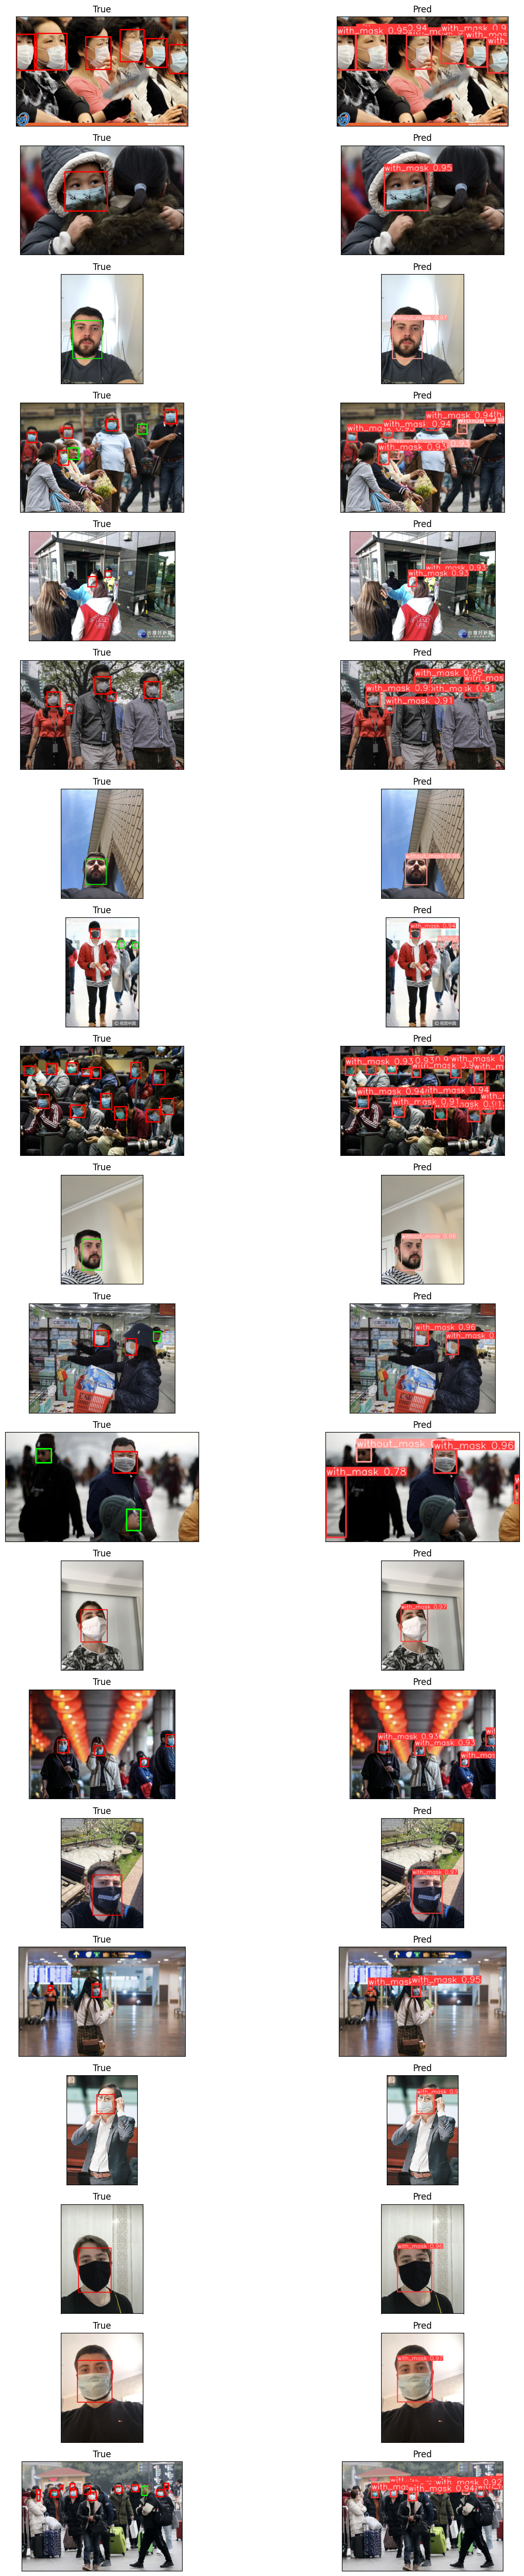

In [ ]:
# Creazione della griglia
fig, axes = plt.subplots(nrows=20, ncols=2, figsize=(15, 50))

# Definizione degli indici delle immagini da visualizzare
num_img = 20
start_index = 40
idx = list(range(start_index, start_index + num_img))

# Estrazione dei percorsi delle immagini (originali e predette)
true_img_paths = itemgetter(*idx)(glob.glob('/content/datasets/test/images/*.png'))
pred_img_paths = itemgetter(*idx)(glob.glob('/content/yolo_utils/runs/detect/exp7/*.png'))

for i, (true_image, pred_image) in enumerate(zip(true_img_paths, pred_img_paths)):

  # Lettura immagini e conversione da BGR a RGB
  true_img = cv2.imread(true_image)
  pred_img = cv2.imread(pred_image)
  true_img = cv2.cvtColor(true_img, cv2.COLOR_BGR2RGB)
  pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

  # Creazione del percorso dell'annotazione originale a partire dal percorso dell'immagine
  ann_path = true_image.replace('test/images', 'annotations').replace('png', 'xml')

  tree = ET.parse(ann_path)
  root = tree.getroot()
  for obj in root.findall("object"):
    # Estrazione della label e delle coordinate
    cls = obj.find("name").text
    xmin = int(obj.find("bndbox/xmin").text)
    ymin = int(obj.find("bndbox/ymin").text)
    xmax = int(obj.find("bndbox/xmax").text)
    ymax = int(obj.find("bndbox/ymax").text)

    # Creazione delle bounding box
    if cls == 'with_mask':
      cv2.rectangle(true_img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255, 0, 0), 2)
    elif cls == 'without_mask':
      cv2.rectangle(true_img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
    else:
      cv2.rectangle(true_img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 0, 255), 2)

  # True
  axes[i, 0].imshow(true_img)
  axes[i, 0].set_title("True")

  # Pred
  axes[i, 1].imshow(pred_img)
  axes[i, 1].set_title("Pred")

# Rimozione degli assi
for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Visualizzazione
plt.tight_layout()
plt.show()

## Precision e Recall

La **precision** e la **recall** sono due misure fondamentali utilizzate per valutare le prestazioni di un modello di riconoscimento delle mascherine. Entrambe le misure sono importanti per valutare l'accuratezza e l'efficacia del modello nel riconoscere correttamente la presenza o l'assenza di mascherine nelle immagini analizzate.



La **precision** misura la proporzione di previsioni corrette rispetto a tutte le previsioni positive effettuate dal modello. Indica quanto il modello è preciso nel riconoscere correttamente le mascherine e le loro assenze. Un valore elevato di precisione significa che il modello ha una bassa percentuale di falsi positivi, ovvero ha fatto poche previsioni errate sulle mascherine.


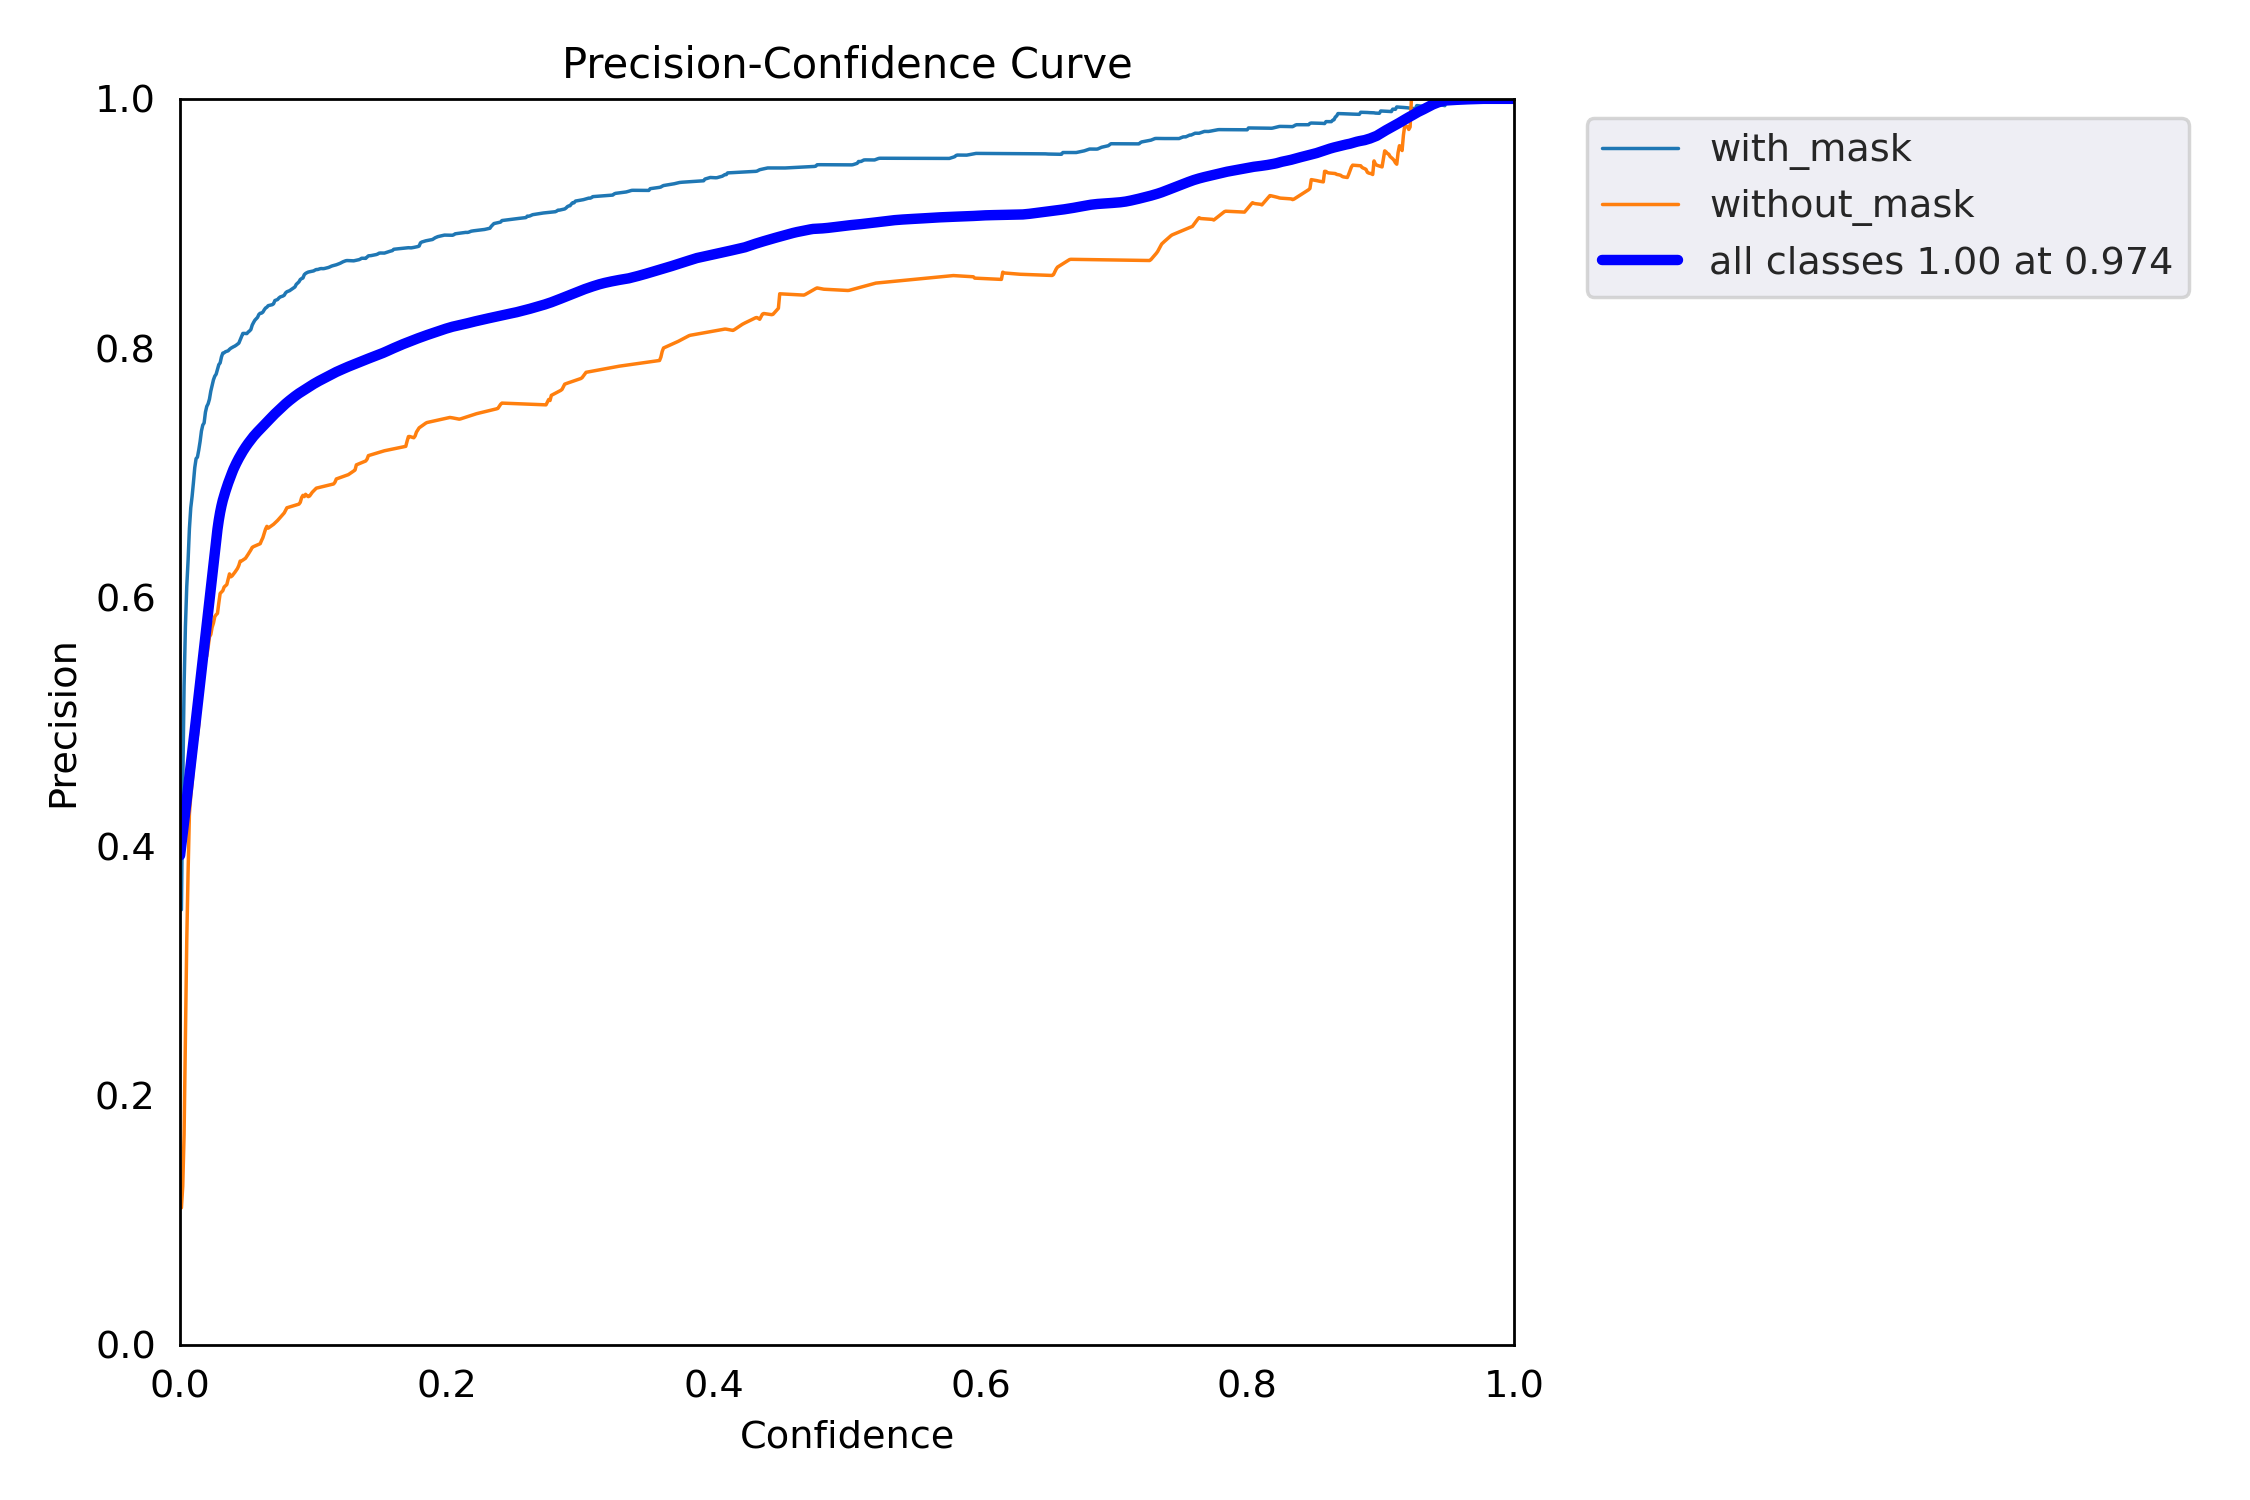

In [ ]:
# Precision
precision = cv2.imread('/content/yolo_utils/yolo-training/P_curve.png')
cv2_imshow(precision)

D'altra parte, la **recall** misura la proporzione di oggetti positivi correttamente individuati dal modello rispetto al numero totale di oggetti positivi presenti nel dataset di riferimento. Rappresenta la capacità del modello di individuare tutti gli oggetti positivi in modo completo e accurato. Una recall elevata indica che il modello riesce a individuare la maggior parte delle mascherine correttamente, riducendo al minimo i cosiddetti falsi negativi, ovvero le mascherine non riconosciute.

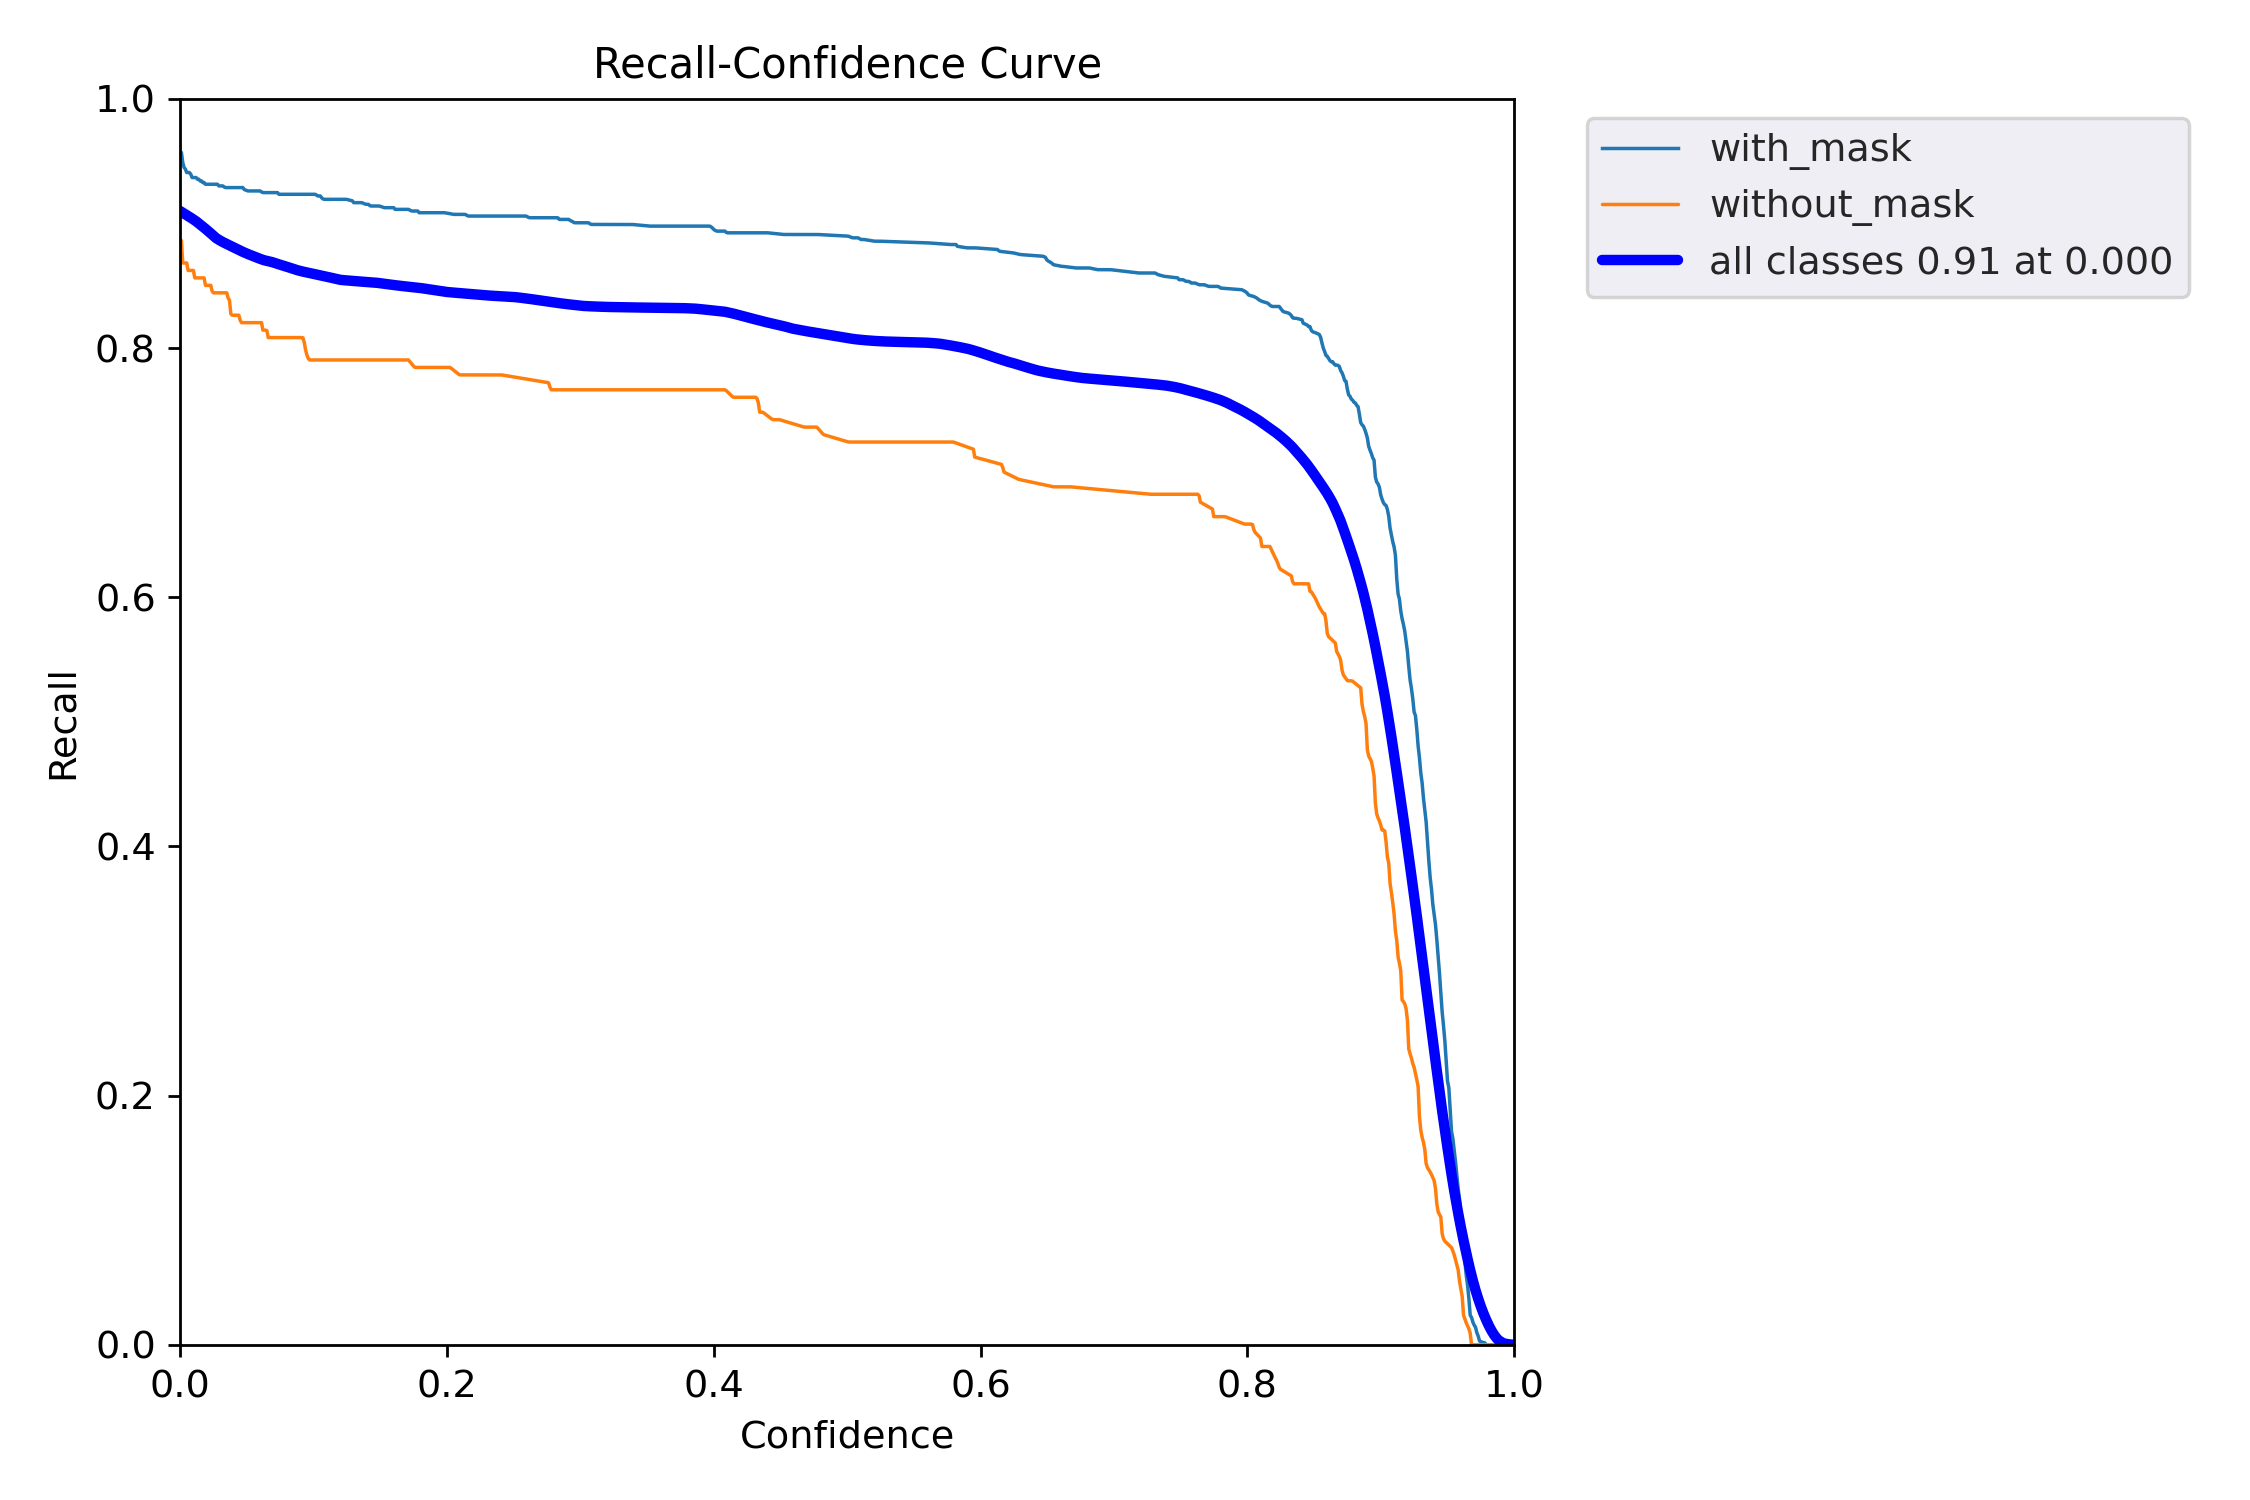

In [ ]:
# Recall
recall = cv2.imread('/content/yolo_utils/yolo-training/R_curve.png')
cv2_imshow(recall)

Il seguente grafico mostra la relazione tra precisione e richiamo al variare della soglia di confidenza. Solitamente, i due valori sono inversamente correlati: aumentare la precisione spesso comporta una diminuzione del richiamo e viceversa.

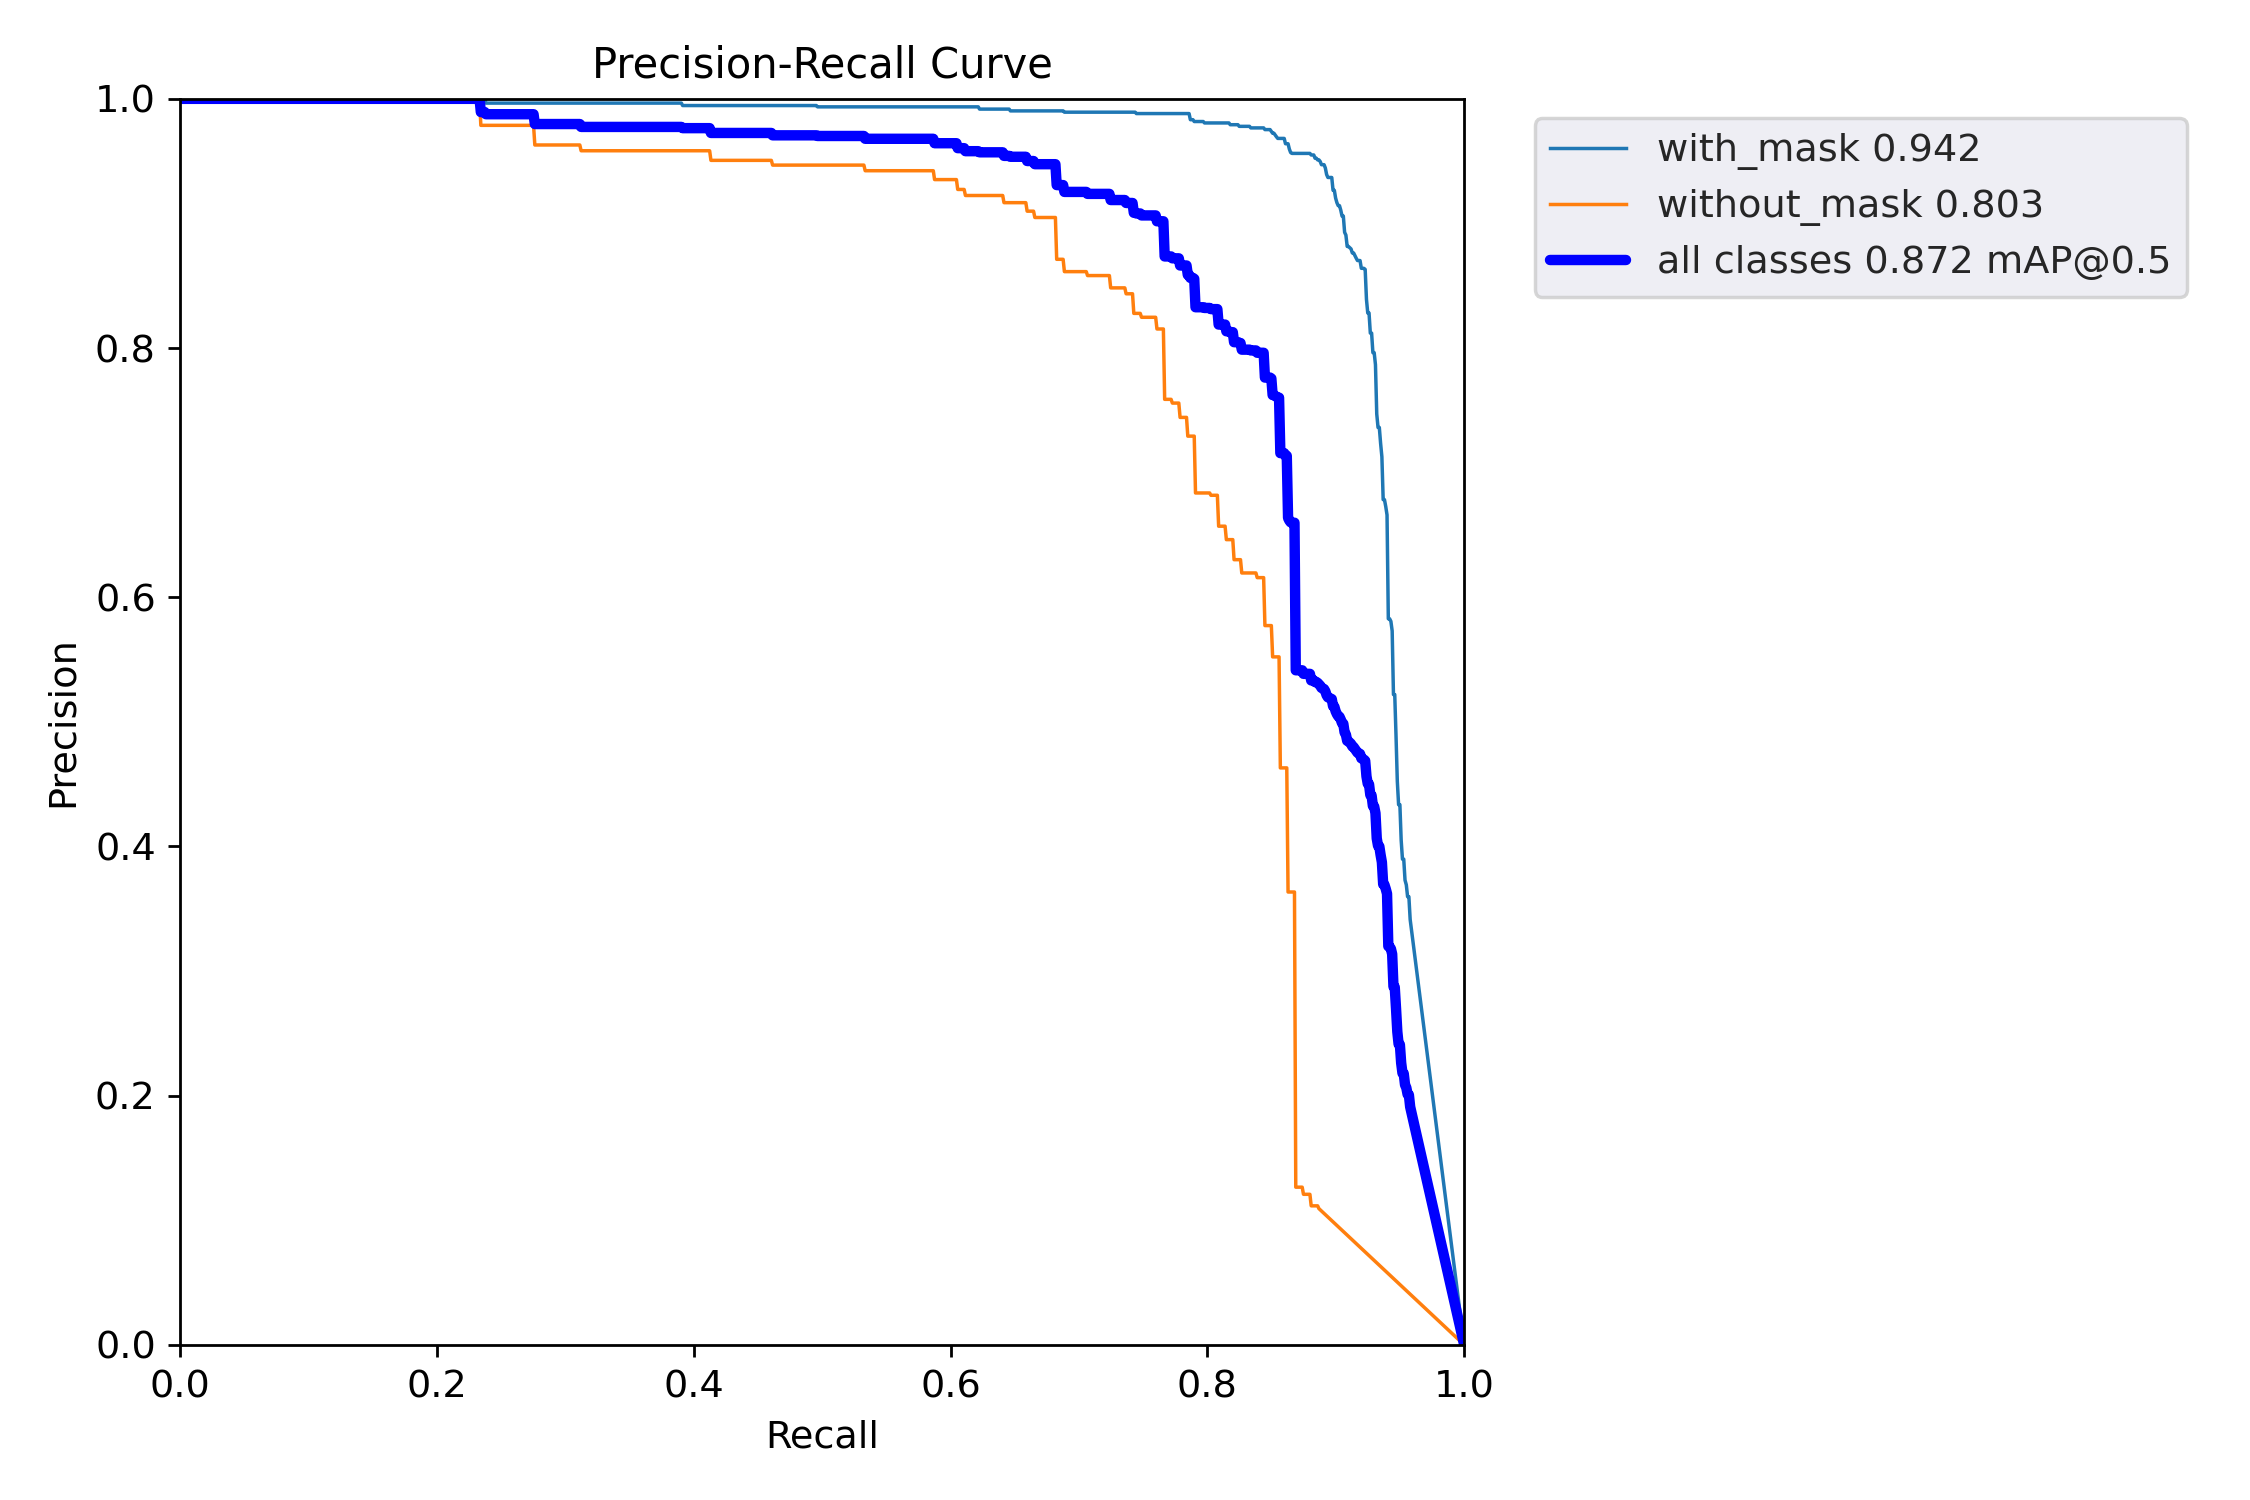

In [ ]:
# Precision-Recall
pr_curve = cv2.imread('/content/yolo_utils/yolo-training/PR_curve.png')
cv2_imshow(pr_curve)

## F1 Score

L'**F1-score** è una misura complessiva delle prestazioni di un modello che tiene conto sia della precisione che della recall. È definita come la media armonica di precisione e recall e fornisce una stima bilanciata delle prestazioni del modello.

La media armonica è utilizzata come formula di aggregazione perché penalizza i valori bassi in modo più significativo rispetto alla media aritmetica. Questo significa che se uno dei due valori (precisione o recall) è molto basso, l'F1-score sarà influenzato negativamente e risulterà essere un valore basso.

Il seguente grafico mostra come varia la misura dello score F1 al variare della soglia di confidenza applicata sulle predizioni del modello.

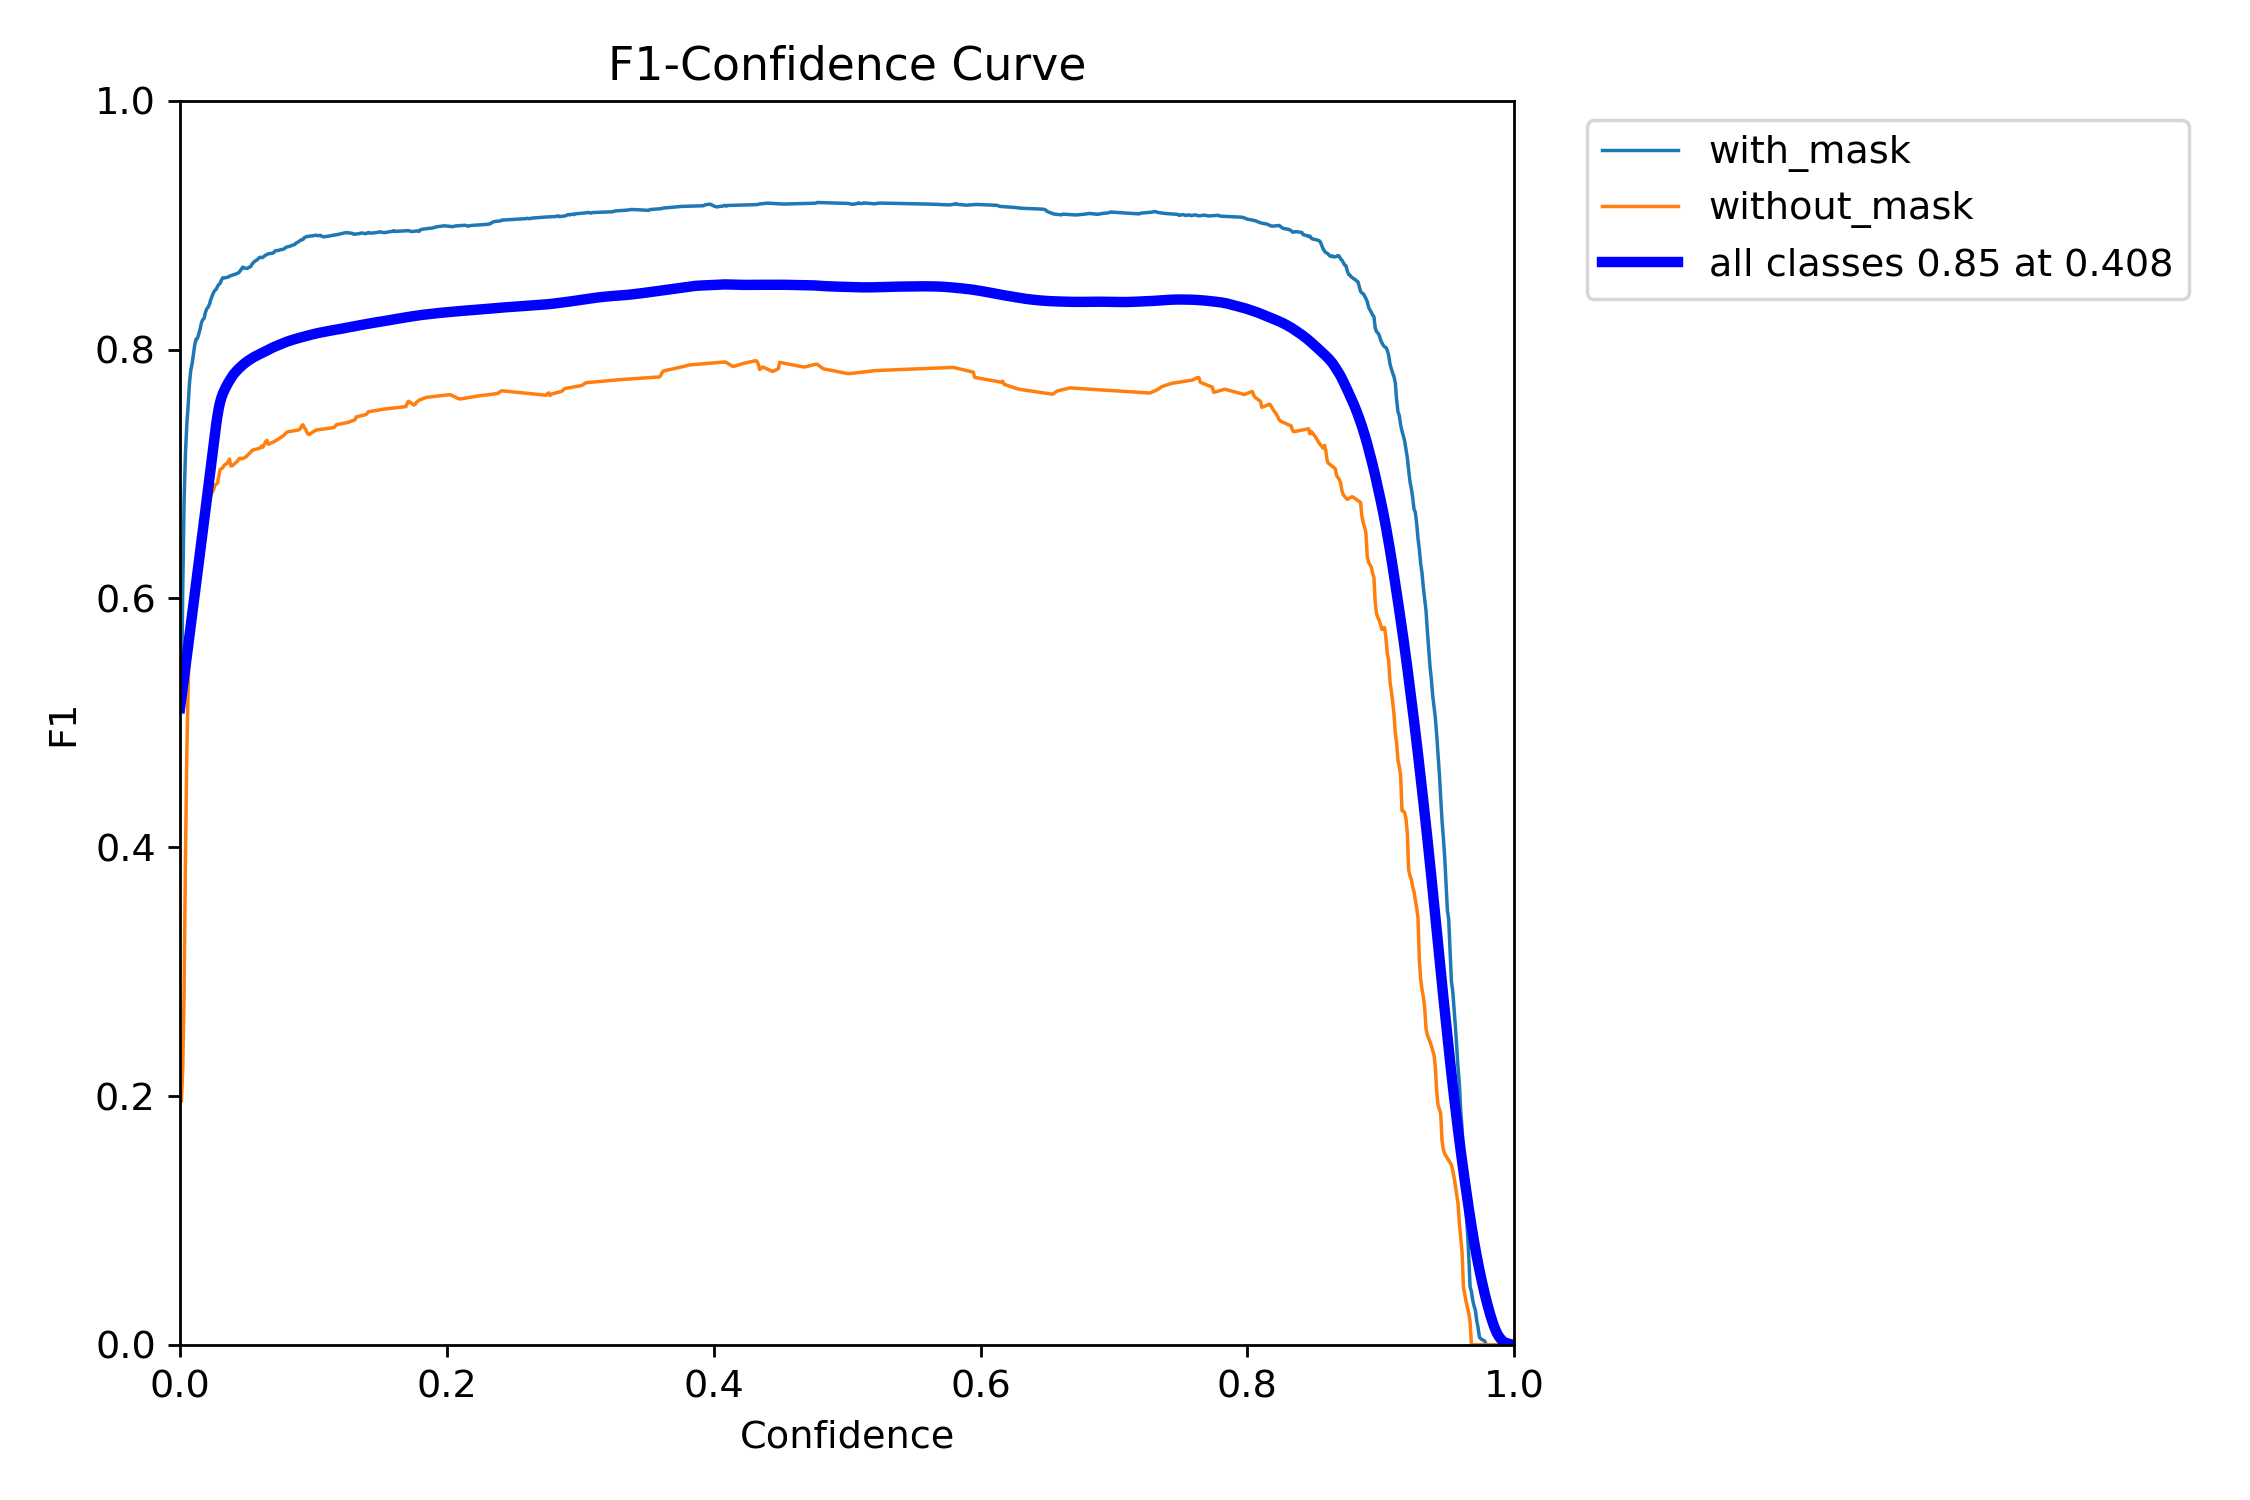

In [ ]:
F1_curve = cv2.imread('/content/yolo_utils/yolo-training/F1_curve.png')
cv2_imshow(F1_curve)

## Medium Average Precision

L'**Average Precision** (AP) rappresenta la precisione media del modello per ciascuna classe. Viene calcolato calcolando l'area sotto la curva di precisione-recall per la classe specifica. L'AP valuta la capacità del modello di effettuare previsioni precise (precisione) e di individuare correttamente gli oggetti positivi (recall) per quella specifica classe. Un valore di AP più alto indica una migliore performance del modello per quella classe.

Il **mean Average Precision** (mAP) rappresenta la media delle Average Precision (AP) calcolate per tutte le classi del problema. È una misura complessiva delle prestazioni del modello che tiene conto delle varie classi affrontate. Il mAP fornisce una stima generale dell'accuratezza e della capacità del modello di riconoscere correttamente gli oggetti di diverse classi.



Il primo grafico riporta l'**mAP\@0.5**, ovvero la media delle precisioni medie (AP) per tutte le classi applicando una soglia di confidenza pari a 0.5 (considerando solo le predizioni con una IoU minima del 50% rispetto agli oggetti del ground truth).


Il secondo grafico riporta l'**mAP\@0.5:0.95**, che rappresenta la media delle precisioni medie (AP) per tutte le classi considerando diverse soglie di confidenza. Questo calcolo tiene conto delle predizioni con una sovrapposizione minima (IoU) che varia dal 50% al 95% rispetto agli oggetti di riferimento (ground truth). L'*mAP\@0.5:0.95* fornisce una valutazione più completa delle prestazioni del modello su un intervallo di soglie di confidenza, evidenziando la sua capacità di rilevare e localizzare oggetti a diverse probabilità minime richieste.

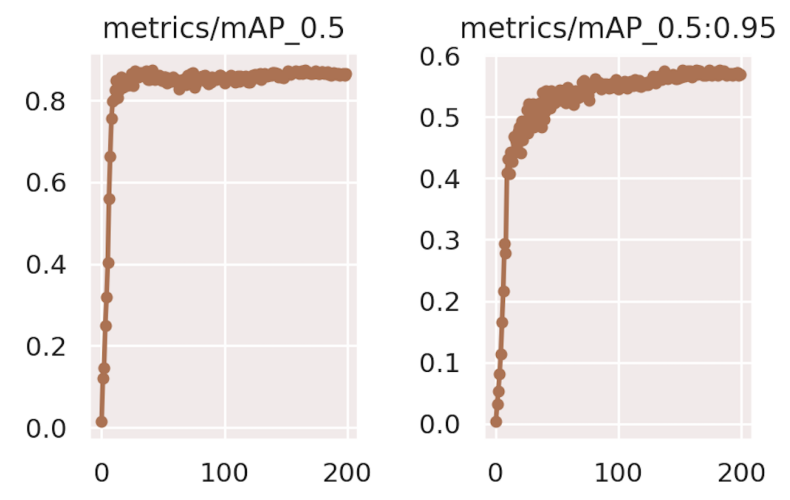

In [ ]:
mAP_05 = cv2.imread('/content/yolo_utils/yolo-training/mAP-05.png')
mAP_05_095 = cv2.imread('/content/yolo_utils/yolo-training/mAP-05-095.png')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
axes[0].imshow(mAP_05)
axes[0].axis('off')
axes[1].imshow(mAP_05_095)
axes[1].axis('off')

# Visualizzazione
plt.tight_layout()
plt.show()

## Matrice di confusione

E' di seguito riportato il codice per creare la matrice di confusione utilizzando i conteggi totali dei true positives (*conf_total_tp*), false positives (*conf_total_fp*), false negatives (*conf_total_fn*) e true negatives (*conf_total_tn*).


La matrice di confusione viene rappresentata come un array NumPy con dimensioni 2x2. Successivamente, i valori della matrice sono convertiti ad interi.


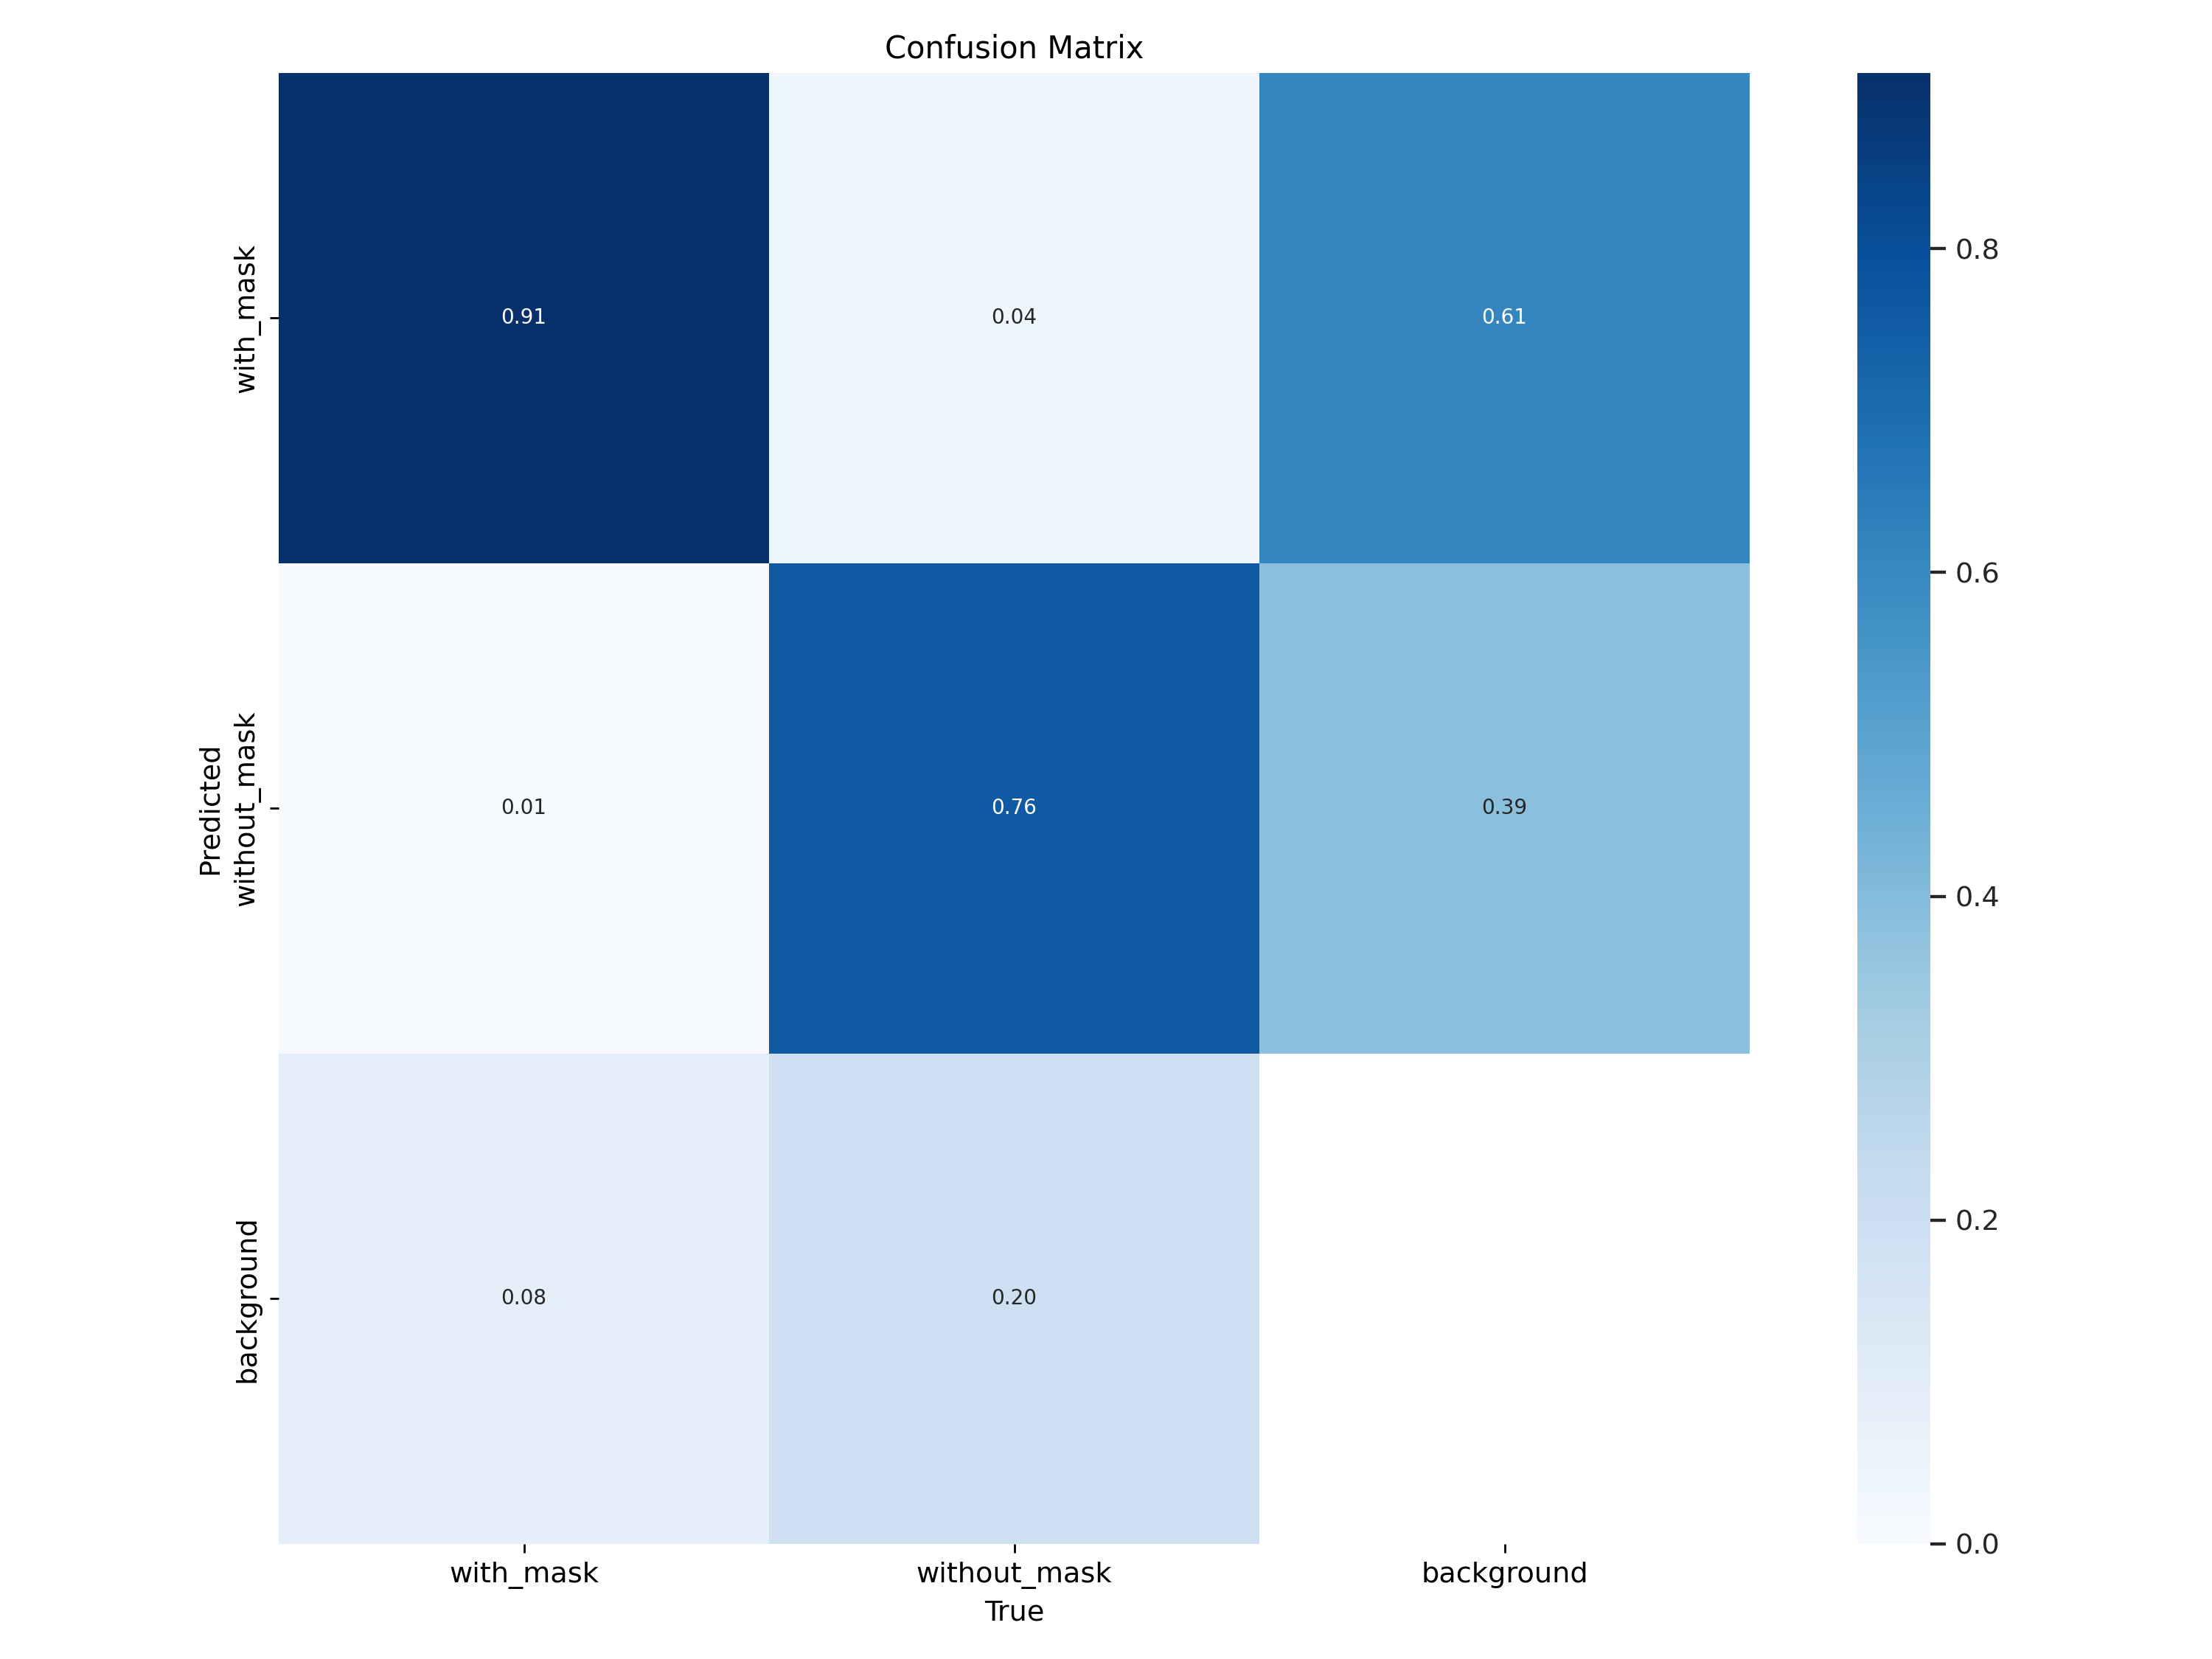

In [ ]:
confusion_matrix = cv2.imread('/content/yolo_utils/yolo-training/confusion_matrix.png')
cv2_imshow(confusion_matrix)